# Flood Risk Analysis — Kerala 2018

This notebook analyzes the 2018 Kerala floods using the provided dataset. It includes data exploration, visualization, and insights into rainfall, warnings, and casualties across districts.

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# 2. Load the dataset
df = pd.read_csv('warnings_actual_predicted.csv')
df.head()

,district,date,actual_rainfall,predicted_rainfall
0,Alappuzha,8/10/2018,Green,Yellow
1,Alappuzha,8/11/2018,Green,Red
2,Alappuzha,8/12/2018,Green,Red
3,Alappuzha,8/13/2018,Green,Orange
4,Alappuzha,8/14/2018,Green,Orange


In [3]:
# 3. Explore the dataset
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())

Shape of the dataset: (210, 4)

First 5 rows:
     district       date actual_rainfall predicted_rainfall
0  Alappuzha  8/10/2018           Green             Yellow
1  Alappuzha  8/11/2018           Green                Red
2  Alappuzha  8/12/2018           Green                Red
3  Alappuzha  8/13/2018           Green             Orange
4  Alappuzha  8/14/2018           Green             Orange

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   district            210 non-null    object
 1   date                210 non-null    object
 2   actual_rainfall     210 non-null    object
 3   predicted_rainfall  210 non-null    object
dtypes: object(4)
memory usage: 6.7+ KB
None

--- Statistical Summary ---
         district       date actual_rainfall predicted_rainfall
count         210        210             210   

In [4]:
# 4. District-wise total rainfall (if columns exist)
if {'District', 'Rainfall'}.issubset(df.columns):
    plt.figure(figsize=(12,5))
    sns.barplot(data=df, x='District', y='Rainfall', palette='Blues_d')
    plt.title('Rainfall by District')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
# 5. Heatmap of warnings and casualties (if present)
if {'Casualties', 'Warnings', 'District'}.issubset(df.columns):
    pivot = df.pivot_table(index='District', values=['Casualties','Warnings'])
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=True, cmap='Reds', fmt='g')
    plt.title('Casualties and Warnings by District')
    plt.tight_layout()
    plt.show()


✅ Data exploration complete. Ready for further analysis or sharing.

## District-wise Details Heatmaps

The following heatmaps use the new `district_wise_details.csv` file to visualize flood impact metrics across Kerala districts. Both a value heatmap and a correlation heatmap are provided.

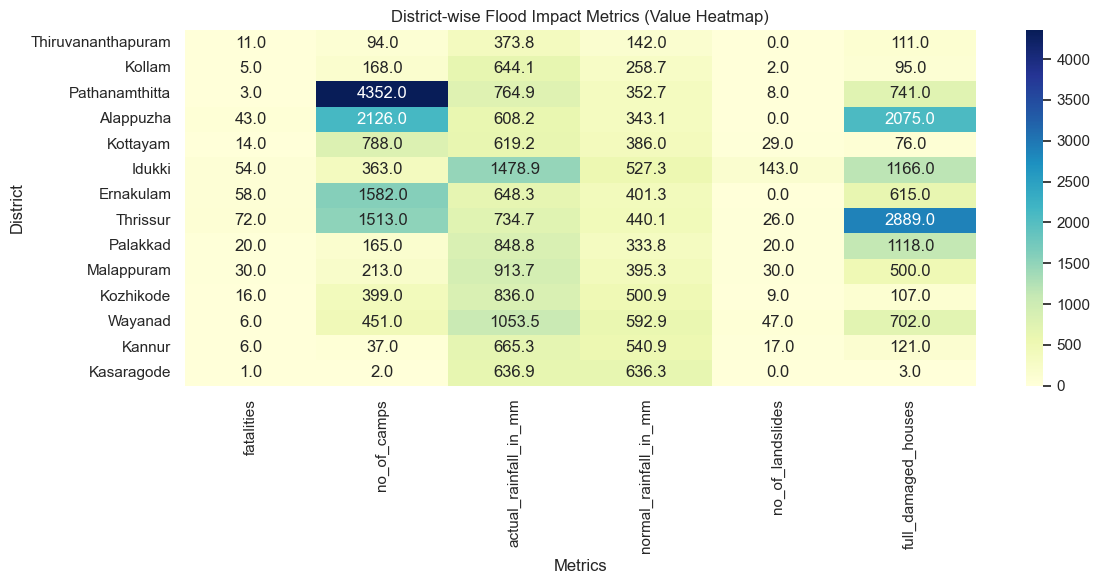

In [8]:
# Load the new district-wise details CSV
district_df = pd.read_csv('district_wise_details.csv')

# Set district as index for heatmap
heatmap_data = district_df.set_index('district')

# Plot value heatmap (districts vs. metrics)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('District-wise Flood Impact Metrics (Value Heatmap)')
plt.ylabel('District')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

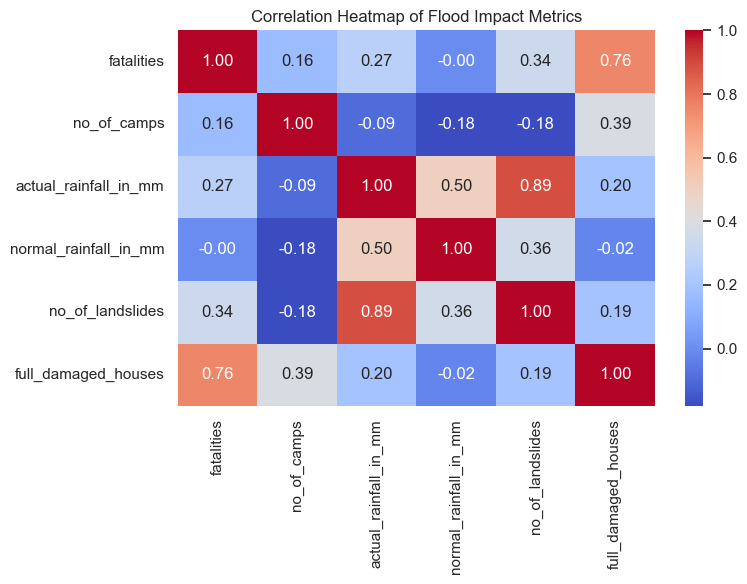

In [9]:
# Correlation heatmap of district-wise metrics
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Flood Impact Metrics')
plt.tight_layout()
plt.show()